In [1]:
import sys
import os
import numpy as np
import pandas as pd
import argparse
from pathlib import Path
import glob
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import spearmanr

%matplotlib inline

import datetime
import imp
sys.path.append('../code/')

In [2]:
import data_support
imp.reload(data_support)
from  data_support import get_data

In [3]:
import model
imp.reload(model)
from model import model, fit_model,transform_params,untransform_params

In [4]:
plot_convert = {}
plot_convert['alpha']=r'$\lambda$'
plot_convert['beta_stage2']=r'$\beta^{2nd}$'
plot_convert['beta_MB']=r'$\beta^{MB}$'
plot_convert['beta_MF1']=r'$\beta^{MF}$'
plot_convert['beta_sticky']=r'$\beta^{sticky}$'
plot_convert['eta']=r'$\eta^2$'
plot_convert['cvar_alpha']=r'$\alpha$'
plot_convert['dcvar_mb_mf_sticky']='CVaR-model'
plot_convert['mean_mb_mf_sticky']='mean-model'

In [5]:
REFIT = False

## Run Analysis: Generate and Recover (Experiment 1)

### Fit Participants

In [6]:
np.random.seed(1)

fitted_filenames = glob.glob('../results/model_fits/experiment1_dcvar_mb_mf_sticky/*')
print(len(fitted_filenames))
fitted_filenames[0:5]

253


['../results/model_fits/experiment1_dcvar_mb_mf_sticky/31Z0PCVWUKFBPAE3IQLV7BVNBSM7TO.pkl',
 '../results/model_fits/experiment1_dcvar_mb_mf_sticky/3K9FOBBF2HJC9IYLPO0THH7WIYDNLT.pkl',
 '../results/model_fits/experiment1_dcvar_mb_mf_sticky/3E337GFOL98WNQKKEX3D4P2OLDKNG7.pkl',
 '../results/model_fits/experiment1_dcvar_mb_mf_sticky/3VE8AYVF8MX56J1LXB8C47CHW7N8FG.pkl',
 '../results/model_fits/experiment1_dcvar_mb_mf_sticky/3KKG4CDWKIYVM8N6IMI7DZA1R8L498.pkl']

In [7]:
if REFIT: 
    for filename in fitted_filenames:

        # get participants data
        ID = os.path.basename(filename).replace('.pkl','')
        print(ID)
        trial_data = get_data('../data/all_twostep_data_study1/',ID+'.csv')
        drifting_probs=trial_data[['drift 1','drift 2','drift 3','drift 4']].values.astype('float')

        # get params
        model_name_file='dcvar_mb_mf_sticky'
        model_name='dcvar_mb_mf_sticky'
        model_filename = glob.glob('../results/model_fits/experiment1_'+model_name_file+'/'+ID+'*')[0]

        with open(model_filename, 'rb') as f:
            fit_results = pickle.load(f)

        param_names = fit_results['param_names']
        params = fit_results['params']

        # transform parameters 
        params_t = [transform_params(param,param_name) for param,param_name in zip(params,param_names)]

        # generate new data 
        print('generating data')
        generative_results = model(params_t,
                                   model_name,
                                  stage1_choices=None,
                                  stage2_choices=None,
                                  stage2_states=None,
                                  outcomes=None,
                                  return_nllk=False,
                                  generative=True,
                                  drifting_probs=drifting_probs)

        # fit 
        print('fitting')
        recovery_results = fit_model(generative_results,
                                      model_name,
                                      multi_starts=6,
                                      parrallel=True,
                                      tol=1e-4,
                                      method='L-BFGS-B')

        # save 
        savename = '../results/model_fits/experiment1_dcvar_mb_mf_sticky_gen_recovery/'+str(ID)
        print('saving...'+savename)

        if not os.path.isdir(os.path.dirname(savename)):
            os.mkdir(os.path.dirname(savename))

        with open(savename+'_gen.pkl', 'wb') as f:
            pickle.dump(generative_results, f)

        with open(savename+'_rec.pkl', 'wb') as f:
            pickle.dump(recovery_results, f)

## Generate and Recover (Experiment 2)

### Fit Participants

In [8]:
np.random.seed(1)

fitted_filenames = glob.glob('../results/model_fits/experiment2_dcvar_mb_mf_sticky/*')
print(len(fitted_filenames))
fitted_filenames[0:5]

539


['../results/model_fits/experiment2_dcvar_mb_mf_sticky/3Z7EFSHGN9EOI8IJEHU3C0880P3CX0.pkl',
 '../results/model_fits/experiment2_dcvar_mb_mf_sticky/3LEIZ60CDJZBP5BV3F8X7VNB1ENZ9B.pkl',
 '../results/model_fits/experiment2_dcvar_mb_mf_sticky/3WI0P0II61SEQ42L5EJM7O42J7JDRR.pkl',
 '../results/model_fits/experiment2_dcvar_mb_mf_sticky/3NQL1CS15R89HMETAUBAL636MG1VY3.pkl',
 '../results/model_fits/experiment2_dcvar_mb_mf_sticky/3EF8EXOTT1V30L3WHGQI4VH2LV31JJ.pkl']

In [9]:
if REFIT:
    for filename in fitted_filenames:

        # get participants data
        ID = os.path.basename(filename).replace('.pkl','')
        print(ID)
        trial_data = get_data('../data/all_twostep_data_study2/',ID+'.csv')
        drifting_probs=trial_data[['drift 1','drift 2','drift 3','drift 4']].values.astype('float')

        # get params
        model_name_file='dcvar_mb_mf_sticky'
        model_name='dcvar_mb_mf_sticky'
        model_filename = glob.glob('../results/model_fits/experiment2_'+model_name_file+'/'+ID+'*')[0]

        with open(model_filename, 'rb') as f:
            fit_results = pickle.load(f)

        param_names = fit_results['param_names']
        params = fit_results['params']

        # transform parameters 
        params_t = [transform_params(param,param_name) for param,param_name in zip(params,param_names)]

        # generate new data 
        print('generating data')
        generative_results = model(params_t,
                                   model_name,
                                  stage1_choices=None,
                                  stage2_choices=None,
                                  stage2_states=None,
                                  outcomes=None,
                                  return_nllk=False,
                                  generative=True,
                                  drifting_probs=drifting_probs)

        # fit 
        print('fitting')
        recovery_results = fit_model(generative_results,
                                      model_name,
                                      multi_starts=6,
                                      parrallel=True,
                                      tol=1e-4,
                                      method='L-BFGS-B')

        # save 
        savename = '../results/model_fits/experiment2_dcvar_mb_mf_sticky_gen_recovery/'+str(ID)
        print('saving...'+savename)

        if not os.path.isdir(os.path.dirname(savename)):
            os.mkdir(os.path.dirname(savename))

        with open(savename+'_gen.pkl', 'wb') as f:
            pickle.dump(generative_results, f)

        with open(savename+'_rec.pkl', 'wb') as f:
            pickle.dump(recovery_results, f)

## Plotting

In [10]:
recovery_filenames1 = glob.glob('../results/model_fits/experiment1_dcvar_mb_mf_sticky_gen_recovery/*_rec.pkl')
print(len(recovery_filenames1))

recovery_filenames2 = glob.glob('../results/model_fits/experiment2_dcvar_mb_mf_sticky_gen_recovery/*_rec.pkl')
print(len(recovery_filenames2))

recovery_filenames = recovery_filenames1 + recovery_filenames2
print(len(recovery_filenames))

252
539
791


In [11]:
rows = []

for filename in recovery_filenames:

    with open(filename.replace('_rec.pkl','_gen.pkl'), 'rb') as f:
        generative_results=pickle.load(f)
        
    with open(filename, 'rb') as f:
        recovery_results=pickle.load(f)
    
    
    ID = os.path.basename(filename).replace('_rec.pkl','')
        
    row = list(generative_results['params'])
    row.extend(list(recovery_results['params']))
    row.extend(list([generative_results['nllk']]))
    row.extend(list([recovery_results['nllk']]))
    
    rows.append(row)
params_df = pd.DataFrame(rows,columns=[pn+'_gen' for pn in generative_results['param_names']]+\
                                      [pn+'_rec' for pn in generative_results['param_names']]+\
                                      ['nllk_gen','nllk_rec'])
params_df.head()

,alpha_gen,beta_stage2_gen,beta_MB_gen,beta_MF1_gen,beta_sticky_gen,eta_gen,cvar_alpha_gen,alpha_rec,beta_stage2_rec,beta_MB_rec,beta_MF1_rec,beta_sticky_rec,eta_rec,cvar_alpha_rec,nllk_gen,nllk_rec
0,0.479917,13.138406,9.070105,5.373848,2.162055,0.026097,0.833458,0.421990,12.632700,13.541379,11.866597,2.918114,0.008819,0.933116,133.215854,126.884766
1,0.417878,8.054016,3.887542,4.669890,1.441123,0.056591,0.622188,0.455323,6.198724,3.860490,4.159047,1.481888,0.050833,0.520000,182.906680,182.414675
2,0.181082,9.626575,0.361265,1.769454,0.730594,0.001008,0.426876,0.183450,7.276854,4.824576,2.270456,0.756895,0.064375,0.347601,240.663309,237.171005
3,0.350528,13.959375,1.876198,8.000493,1.269955,0.009170,0.101310,0.293337,14.605965,0.009703,10.694822,1.955275,0.004477,0.222278,104.885026,101.439256
4,0.448064,8.663999,0.999091,3.640441,1.305237,0.030560,0.211961,0.590905,7.488093,0.000004,2.952595,1.594436,0.040523,0.187927,158.014593,155.114890


alpha
SpearmanrResult(correlation=0.8965325776124479, pvalue=3.132832182856802e-281)

beta_stage2
SpearmanrResult(correlation=0.9091502543009472, pvalue=2.2112730477839124e-302)

beta_MB
SpearmanrResult(correlation=0.7400913658384233, pvalue=4.324838591008688e-138)

beta_MF1
SpearmanrResult(correlation=0.8665095784994574, pvalue=2.671761624323662e-240)

beta_sticky
SpearmanrResult(correlation=0.9494663966886439, pvalue=0.0)

cvar_alpha
SpearmanrResult(correlation=0.7412630198672543, pvalue=9.473695708473683e-139)

eta
total
SpearmanrResult(correlation=0.5325623370319237, pvalue=3.792954190983796e-59)

eta
> threshold
SpearmanrResult(correlation=0.2220415977258532, pvalue=7.427140827742398e-05)

eta
< threshold
SpearmanrResult(correlation=0.6997549619477653, pvalue=1.5424598917495555e-71)



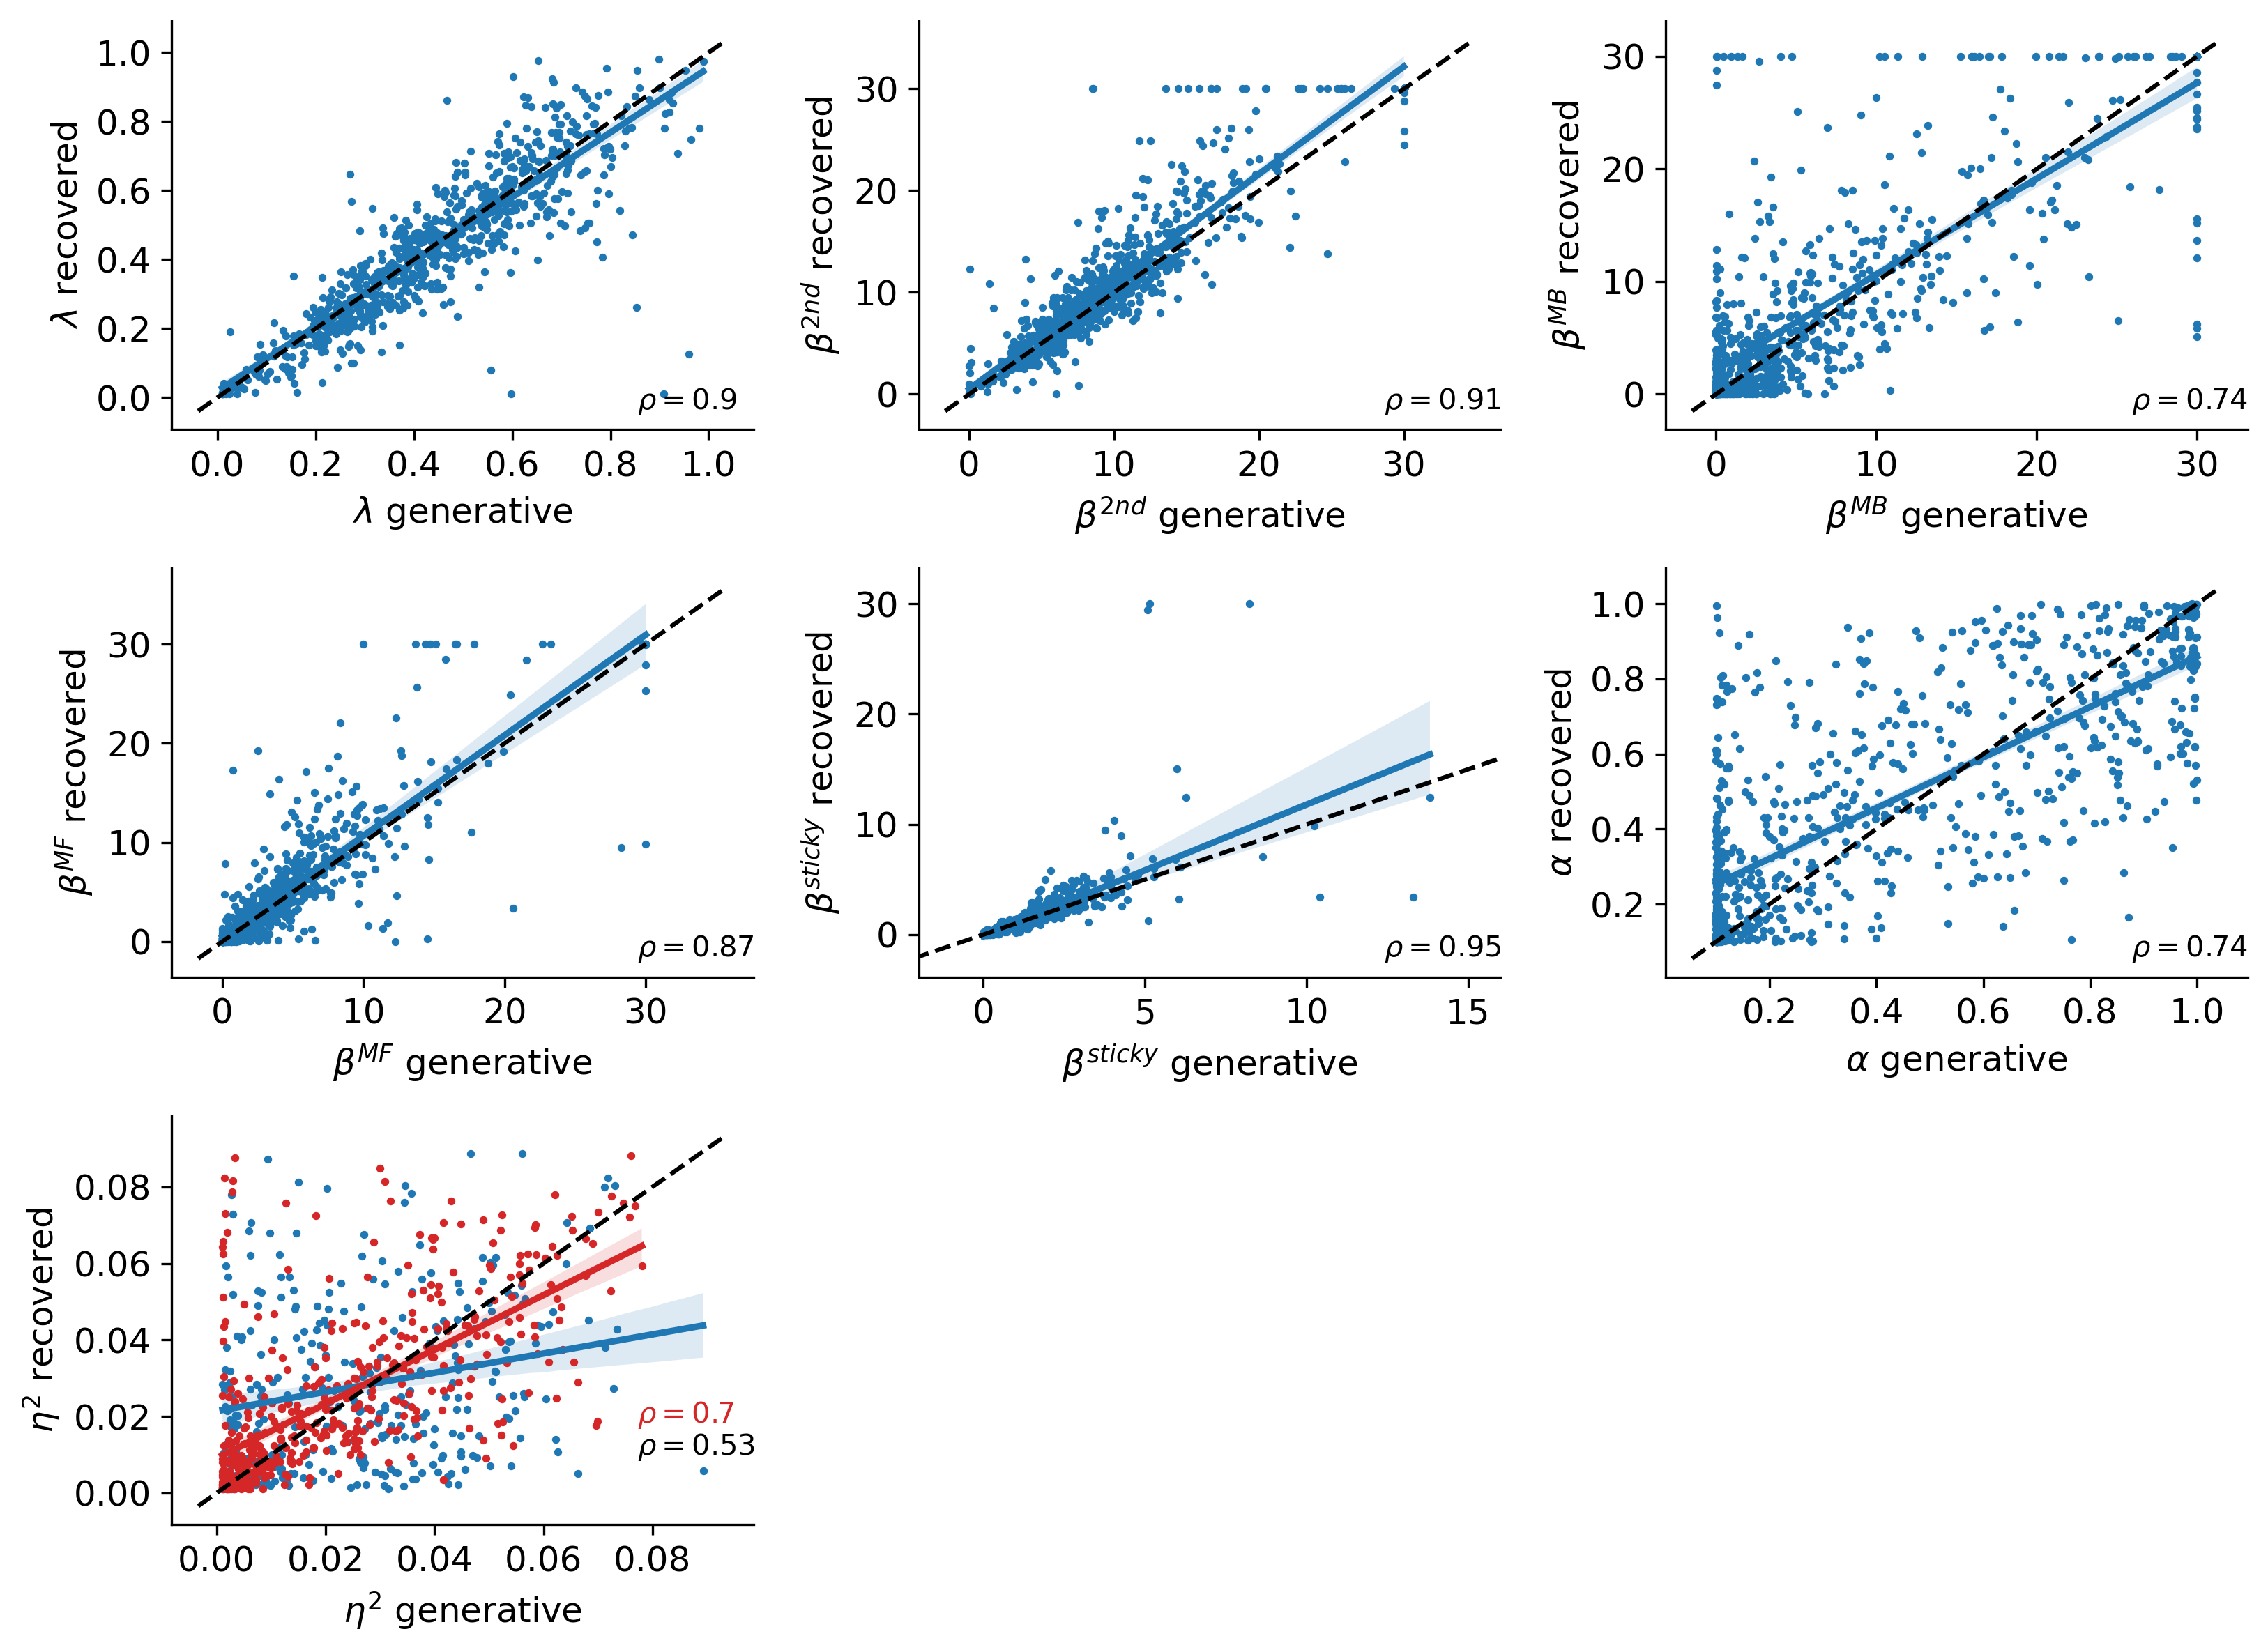

In [12]:
scale = 2
fig,axes = plt.subplots(3,3,figsize=(5.5*2,4*2),dpi=300)
axes = axes.flatten()
fs = 12
ms = 3
thresh = 0.5

param_names = ['alpha',
 'beta_stage2',
 'beta_MB',
 'beta_MF1',
 'beta_sticky',
 'cvar_alpha',
 'eta',
 ]

for param_i,param in enumerate(param_names):

    plt.sca(axes[param_i])
    
    # get data 
    x = params_df[param+'_gen'].values
    y = params_df[param+'_rec'].values
    
    # plot 
    if param=='eta':
        sel = params_df['cvar_alpha_gen']<=thresh
        print(param)
        print('total')
        r,p = spearmanr(x,y)
        print(spearmanr(x,y))
        print()
        
        
        plt.scatter(x[~sel],y[~sel],s=ms,color=sns.color_palette()[0])
        sns.regplot(x=x[~sel],y=y[~sel],marker='None',color=sns.color_palette()[0])
        print(param)
        print('> threshold')
        r1,p1 = spearmanr(x[~sel],y[~sel])
        print(spearmanr(x[~sel],y[~sel]))
        print()
        
        
        plt.scatter(x[sel],y[sel],s=ms,color=sns.color_palette()[3])
        sns.regplot(x=x[sel],y=y[sel],marker='None',color=sns.color_palette()[3])
        print(param)
        print('< threshold')
        r2,p2 = spearmanr(x[sel],y[sel])
        print(spearmanr(x[sel],y[sel]))
        print()
        
        
    else:
        plt.scatter(x,y,s=ms)
        sns.regplot(x=x,y=y,marker='None')
        print(param)
        r,p = spearmanr(x,y)
        print(spearmanr(x,y))
        print()
    
    # style 
    plt.xlabel(plot_convert[param]+' generative',fontsize=fs)
    plt.ylabel(plot_convert[param]+' recovered',fontsize=fs)
    ylims =  plt.ylim()
    xlims =  plt.xlim()
    points = [np.min([xlims[0],ylims[0]]),np.max([xlims[1],ylims[1]])]
    plt.plot(points,points,color='k',linestyle='--')
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    sns.despine()
    
    # add spearman to plot
    if param=='eta':
        plt.annotate(r'$\rho=$'+str(np.round(r,2)),[0.8,0.17],xycoords='axes fraction')
        #plt.annotate(r'$\rho=$'+str(np.round(r1,2)),[0.8,0.17],xycoords='axes fraction',color=sns.color_palette()[0])
        plt.annotate(r'$\rho=$'+str(np.round(r2,2)),[0.8,0.25],xycoords='axes fraction',color=sns.color_palette()[3])
    else:
        plt.annotate(r'$\rho=$'+str(np.round(r,2)),[0.8,0.05],xycoords='axes fraction')
        
    # shrink x-axis for beta_sticky
    if param=='beta_sticky':
        plt.xlim([-2,16])
    
# remove other axes 
plt.sca(axes[-1])
plt.yticks([])
plt.xticks([])
plt.axis('off')

plt.sca(axes[-2])
plt.yticks([])
plt.xticks([])
plt.axis('off')

plt.tight_layout()
    